In [1]:
%pip install numpy
%pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/1172123145.py:12: RuntimeWarning: divide by zero encountered in divide
  t_bracket = ((1-t)**2)/ (t**2)


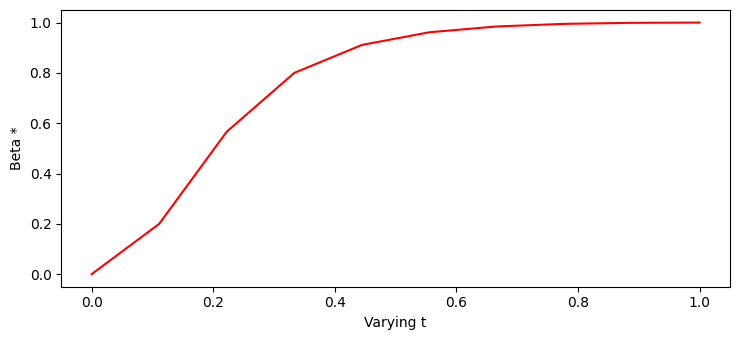

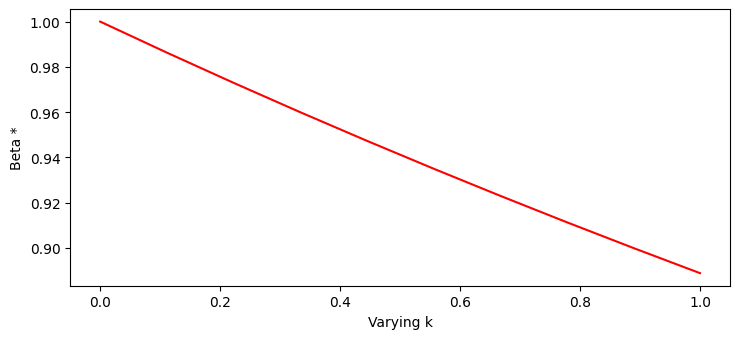

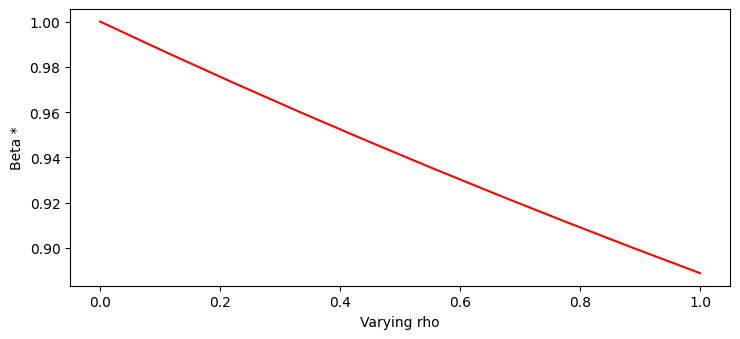

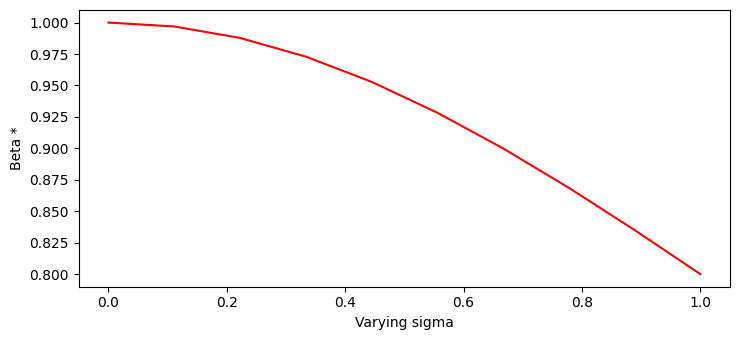

In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(variables):
   t = variables["t"]
   k = variables["k"]
   rho = variables["rho"]
   sigma = variables["sigma"]
   t_bracket = ((1-t)**2)/ (t**2) 
   return 1/(1 + (k*rho*(sigma**2)*t_bracket))

def main():
    variables = {
        "t" : 0.5,
        "k" : 0.5,
        "rho" : 0.5,
        "sigma" : 0.5
    }   
    for key, value in variables.items():
        variables[key] = np.linspace(0,1,10)
        plt.plot(variables[key], f(variables), color='red')
        variables[key] = 0.5
        plt.xlabel(f"Varying {key}")
        plt.ylabel("Beta *")
        plt.show()

main()

/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/1903057745.py:9: RuntimeWarning: divide by zero encountered in divide
  t_bracket = ((1-t)**2)/ (t**2)
/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/1903057745.py:10: RuntimeWarning: invalid value encountered in multiply
  return 1/(1 + (k*rho*(sigma**2)*t_bracket))
/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/1903057745.py:19: RuntimeWarning: invalid value encountered in divide
  return numerator/denominator


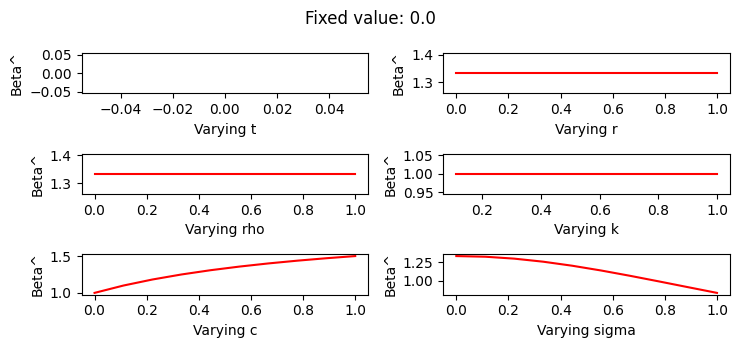

/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/1903057745.py:19: RuntimeWarning: divide by zero encountered in divide
  return numerator/denominator


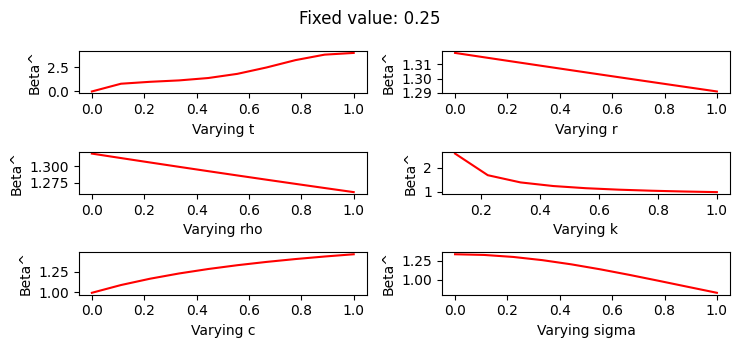

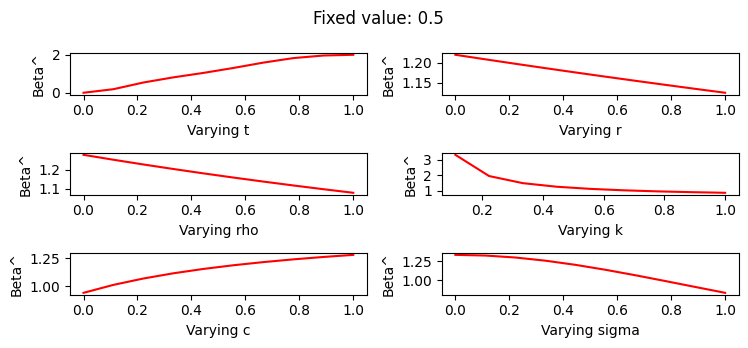

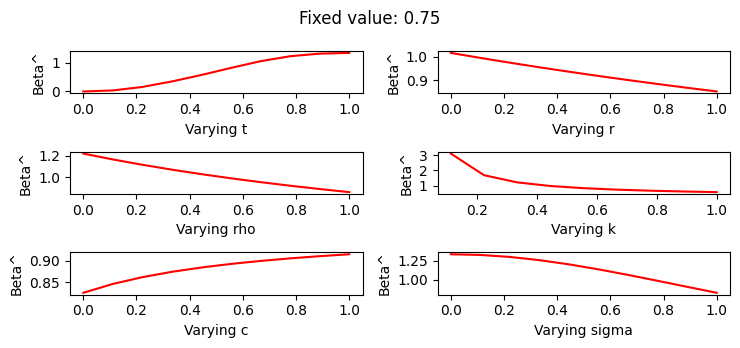

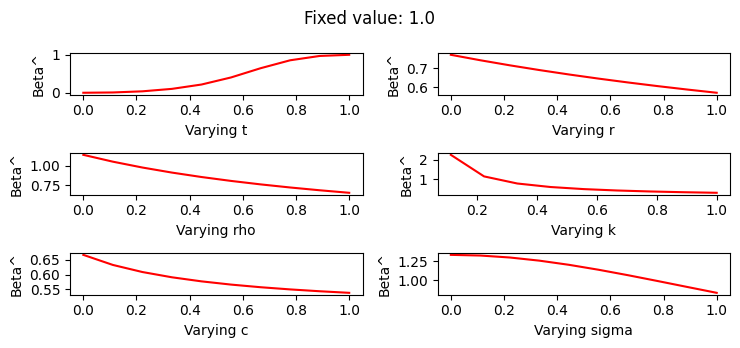

/var/folders/3x/0wljhxm92zggbn44wykp4r380000gn/T/ipykernel_20862/1903057745.py:45: RuntimeWarning: divide by zero encountered in divide
  return (beta_hat*t)/c


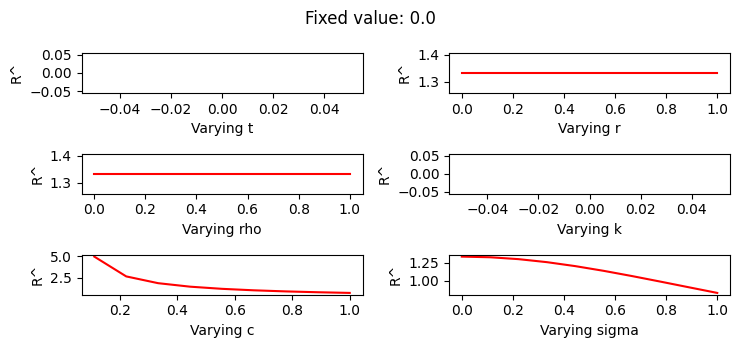

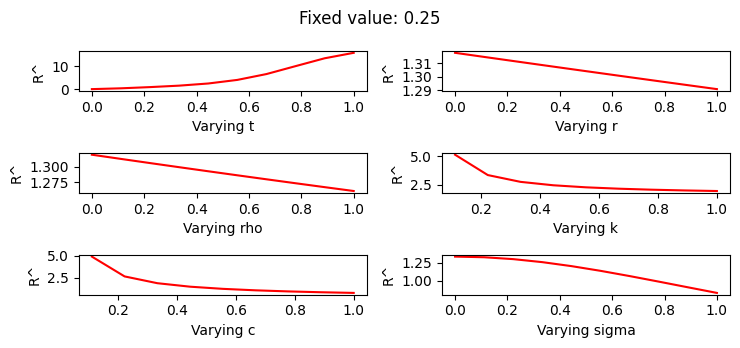

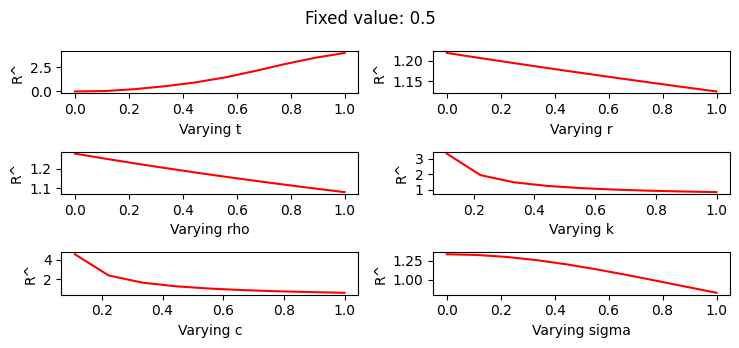

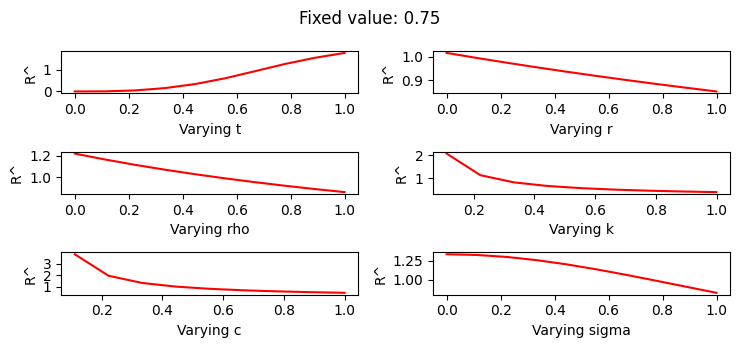

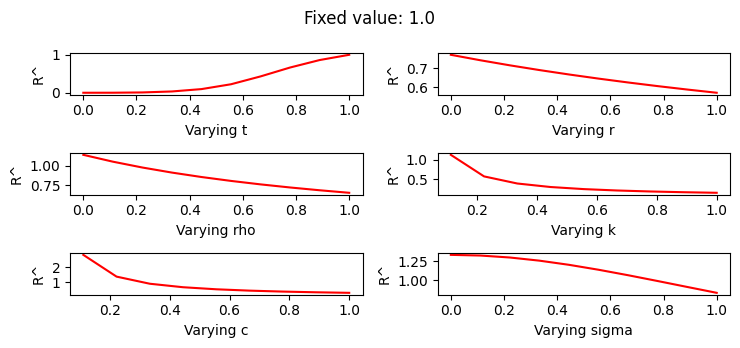

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def cal_beta_star(t,k,rho,sigma):
   t_bracket = ((1-t)**2)/ (t**2) 
   return 1/(1 + (k*rho*(sigma**2)*t_bracket))

def cal_beta_hat(t,k,rho, sigma,r,c):
    beta_star = cal_beta_star(t,k,rho,sigma)
    numerator = (((1-t)**2 * beta_star * k) + (t**2) * (beta_star**2) * c)
    den1 = (r*c*k*(sigma**2)) * ((1-t)**2)
    den2 = ((1-t)**2) * k
    den3 = (beta_star**2)*c*k*((t**2) + rho*(sigma**2)*((1-t)**2))
    denominator = den1 + den2 + den3
    return numerator/denominator

def f1(variables):
   t = variables["t"]
   k = variables["k"]
   rho = variables["rho"]
   sigma = variables["sigma"]
   return cal_beta_star(t,k,rho, sigma)

def f2(variables):
   t = variables["t"]
   k = variables["k"]
   c = variables["c"]
   r = variables["r"]
   rho = variables["rho"]
   sigma = variables["sigma"]
   return cal_beta_hat(t,k,rho, sigma,r,c)

def f3(variables):
    t = variables["t"]
    k = variables["k"]
    c = variables["c"]
    r = variables["r"]
    rho = variables["rho"]
    sigma = variables["sigma"]
    beta_hat =  cal_beta_hat(t,k,rho, sigma,r,c)
    return (beta_hat*t)/c

def main():
    with PdfPages("graphs.pdf") as pdf:
        fixed_value_lower = float(input("Enter Fixed value lower threshold : ") or "0")
        fixed_value_upper = float(input("Enter Fixed value upper threshold : ") or "1")
        freq = float(input("Enter Fixed value frequency : ") or "0.25")
        range_value_lower = float(input("Enter range value lower threshold : ") or "0")
        range_value_upper = float(input("Enter range value upper threshold : ") or "1")

        intial_values = []
        start = fixed_value_lower
        while start <= fixed_value_upper:
            intial_values.append(start)
            start = round(start + freq,2)
        
        functions = [f2, f3]
        labels = ["Beta^", "R^"]
        for idx, f_name in enumerate(functions):
            for i_value in intial_values:
                variable_names = ["t", "k", "c", "r", "rho", "sigma"]
                variables = {}
                for name in variable_names:
                    variables[name] = i_value
                figure, axis = plt.subplots(3, 2)
                count = 0
                for key, value in variables.items():
                    variables[key] = np.linspace(range_value_lower,range_value_upper,10)
                    axis[count%3, count%2].plot(variables[key], f_name(variables), color='red')
                    variables[key] = 0.5
                    axis[count%3, count%2].set(xlabel=f"Varying {key}", ylabel=labels[idx])
                    count +=1
                figure.suptitle(f"Fixed value: {i_value}")
                plt.show()
                
                figure.savefig(pdf, format='pdf')

main()